<a href="https://colab.research.google.com/github/TheMonarch00/ASL-Classification-CNN/blob/main/Sign_Language_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/sign_language_dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/sign_language_dataset/amer_sign2.png
/content/drive/MyDrive/sign_language_dataset/amer_sign3.png
/content/drive/MyDrive/sign_language_dataset/sign_mnist_test.csv
/content/drive/MyDrive/sign_language_dataset/american_sign_language.PNG
/content/drive/MyDrive/sign_language_dataset/sign_mnist_train.csv
/content/drive/MyDrive/sign_language_dataset/sign_mnist_test/sign_mnist_test.csv
/content/drive/MyDrive/sign_language_dataset/sign_mnist_train/sign_mnist_train.csv


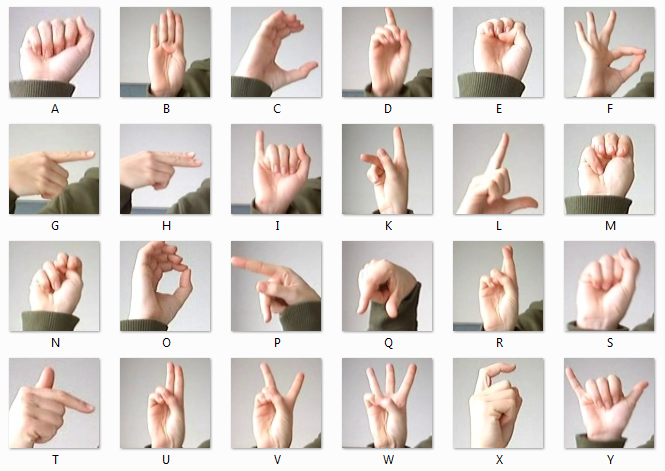

In [30]:
from IPython.display import Image
Image('/content/drive/MyDrive/sign_language_dataset/amer_sign2.png')

In [31]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [32]:
train = pd.read_csv('/content/drive/MyDrive/sign_language_dataset/sign_mnist_train.csv')
test = pd.read_csv('/content/drive/MyDrive/sign_language_dataset/sign_mnist_test.csv')

In [33]:
print(train.shape)
print(test.shape)

(27455, 785)
(7172, 785)


In [34]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [35]:
# Create training and testing arrays
train_set = np.array(train, dtype = 'float32')
test_set = np.array(test, dtype='float32')

In [36]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

(-0.5, 27.5, 27.5, -0.5)

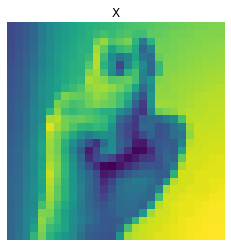

In [37]:
i = random.randint(1,27455)
plt.imshow(train_set[i,1:].reshape((28,28))) 
plt.imshow(train_set[i,1:].reshape((28,28))) 
label_index = train["label"][i]
plt.title(f"{class_names[label_index]}")
plt.axis('off')

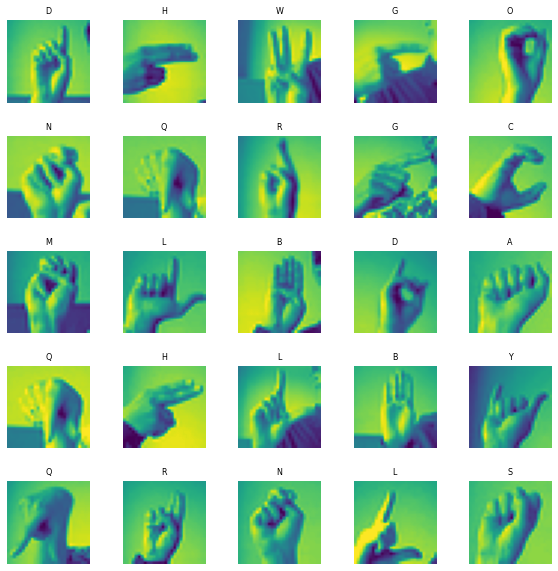

In [38]:
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_set) # get the length of the train dataset
# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 
    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train_set[index,1:].reshape((28,28)) )
    label_index = int(train_set[index,0])
    axes[i].set_title(class_names[label_index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [39]:
# Prepare the training and testing dataset 
X_train = train_set[:, 1:] / 255
y_train = train_set[:, 0]

X_test = test_set[:, 1:] / 255
y_test = test_set[:,0]

In [42]:
df = pd.DataFrame(X_train)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.419608,0.462745,0.498039,0.525490,0.545098,0.560784,0.572549,0.588235,0.600000,0.611765,0.619608,0.627451,0.639216,0.647059,0.623529,0.650980,0.658824,0.666667,0.666667,0.670588,0.670588,0.670588,0.674510,0.670588,0.670588,0.666667,0.666667,0.662745,0.435294,0.474510,0.505882,0.529412,0.552941,0.564706,0.580392,0.592157,0.603922,0.615686,0.627451,0.639216,...,0.803922,0.807843,0.807843,0.811765,0.811765,0.807843,0.807843,0.800000,0.803922,0.800000,0.796078,0.792157,0.556863,0.592157,0.627451,0.674510,0.768627,0.737255,0.737255,0.745098,0.529412,0.376471,0.337255,0.301961,0.301961,0.309804,0.690196,0.803922,0.811765,0.811765,0.811765,0.811765,0.811765,0.811765,0.807843,0.807843,0.807843,0.800000,0.796078,0.792157
1,0.607843,0.615686,0.611765,0.611765,0.611765,0.615686,0.611765,0.619608,0.619608,0.615686,0.619608,0.611765,0.603922,0.603922,0.600000,0.596078,0.592157,0.584314,0.584314,0.580392,0.576471,0.572549,0.564706,0.556863,0.560784,0.541176,0.360784,0.423529,0.619608,0.623529,0.623529,0.623529,0.627451,0.627451,0.627451,0.627451,0.627451,0.627451,0.627451,0.623529,...,0.392157,0.305882,0.470588,0.615686,0.658824,0.419608,0.388235,0.474510,0.521569,0.380392,0.372549,0.470588,0.529412,0.454902,0.372549,0.309804,0.270588,0.337255,0.545098,0.678431,0.784314,0.725490,0.686275,0.776471,0.486275,0.462745,0.368627,0.549020,0.521569,0.329412,0.270588,0.584314,0.501961,0.341176,0.368627,0.639216,0.686275,0.403922,0.529412,0.584314
2,0.733333,0.737255,0.737255,0.733333,0.733333,0.729412,0.733333,0.737255,0.733333,0.729412,0.725490,0.725490,0.725490,0.721569,0.721569,0.721569,0.709804,0.709804,0.701961,0.701961,0.701961,0.698039,0.698039,0.427451,0.203922,0.258824,0.301961,0.325490,0.737255,0.741176,0.741176,0.737255,0.737255,0.741176,0.737255,0.737255,0.737255,0.737255,0.733333,0.725490,...,0.796078,0.800000,0.796078,0.788235,0.784314,0.784314,0.780392,0.776471,0.768627,0.764706,0.760784,0.756863,0.776471,0.650980,0.517647,0.447059,0.349020,0.290196,0.309804,0.301961,0.290196,0.305882,0.517647,0.737255,0.823529,0.819608,0.807843,0.803922,0.800000,0.796078,0.792157,0.788235,0.784314,0.780392,0.776471,0.780392,0.776471,0.764706,0.760784,0.764706
3,0.827451,0.827451,0.831373,0.831373,0.827451,0.823529,0.827451,0.823529,0.823529,0.827451,0.819608,0.811765,0.815686,0.811765,0.807843,0.796078,0.792157,0.788235,0.784314,0.776471,0.772549,0.764706,0.752941,0.772549,0.670588,0.200000,0.203922,0.211765,0.831373,0.835294,0.843137,0.843137,0.831373,0.831373,0.835294,0.831373,0.831373,0.827451,0.827451,0.819608,...,0.968627,0.949020,0.913725,0.905882,0.901961,0.898039,0.890196,0.882353,0.874510,0.866667,0.862745,0.847059,0.227451,0.200000,0.192157,0.196078,0.223529,0.235294,0.066667,0.058824,0.070588,0.066667,0.074510,0.003922,0.623529,1.000000,0.929412,0.937255,0.929412,0.925490,0.921569,0.917647,0.913725,0.905882,0.901961,0.886275,0.882353,0.870588,0.898039,0.639216
4,0.643137,0.654902,0.666667,0.674510,0.690196,0.701961,0.705882,0.721569,0.725490,0.729412,0.737255,0.741176,0.741176,0.745098,0.749020,0.741176,0.745098,0.745098,0.733333,0.745098,0.752941,0.756863,0.749020,0.749020,0.752941,0.752941,0.760784,0.760784,0.650980,0.662745,0.674510,0.682353,0.694118,0.705882,0.713726,0.725490,0.729412,0.733333,0.745098,0.749020,...,0.352941,0.301961,0.345098,0.458824,0.482353,0.498039,0.505882,0.525490,0.568627,0.596078,0.611765,0.701961,0.411765,0.415686,0.411765,0.407843,0.407843,0.407843,0.686275,0.780392,0.698039,0.596078,0.533333,0.509804,0.533333,0.588235,0.462745,0.360784,0.333333,0.298039,0.360784,0.411765,0.411765,0.423529,0.521569,0.639216,0.615686,0.639216,0.643137,0.701961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

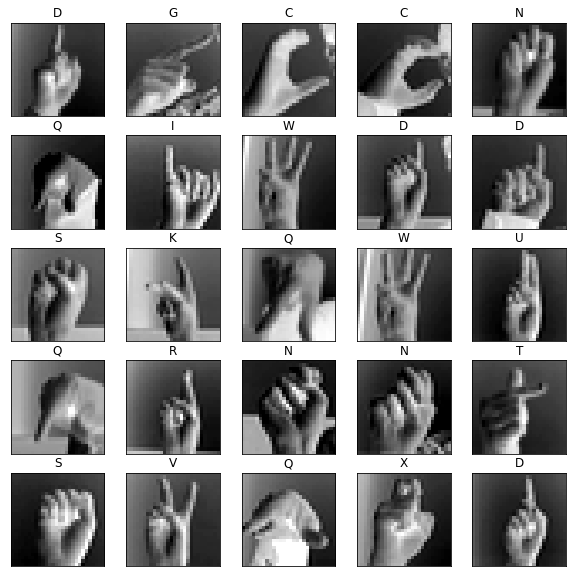

In [13]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345,stratify=y_train)

In [44]:
print(X_train.shape)
print(y_train.shape)


(21964, 784)
(21964,)


In [45]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)

(21964, 28, 28, 1)
(21964,)
(5491, 28, 28, 1)


In [46]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

#Defining the Convolutional Neural Network
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(units = 25, activation = 'softmax'))

In [47]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)        

In [48]:
#Compiling
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

#Training the CNN model
history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 50, verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/50
43/43 [==============================] - 17s 391ms/step - loss: 3.1924 - accuracy: 0.0460 - val_loss: 3.0224 - val_accuracy: 0.1439
Epoch 2/50
43/43 [==============================] - 17s 396ms/step - loss: 2.8249 - accuracy: 0.1366 - val_loss: 2.1939 - val_accuracy: 0.3238
Epoch 3/50
43/43 [==============================] - 17s 396ms/step - loss: 2.1811 - accuracy: 0.2841 - val_loss: 1.6193 - val_accuracy: 0.5054
Epoch 4/50
43/43 [==============================] - 17s 399ms/step - loss: 1.7001 - accuracy: 0.4389 - val_loss: 1.1675 - val_accuracy: 0.6531
Epoch 5/50
43/43 [==============================] - 18s 408ms/step - loss: 1.2919 - accuracy: 0.5675 - val_loss: 0.7793 - val_accuracy: 0.7846
Epoch 6/50
43/43 [==============================] - 17s 401ms/step - loss: 0.9918 - accuracy: 0.6560 - val_loss: 0.5655 - val_accuracy: 0.8365
Epoch 7/50
43/43 [==============================] - 17s 403ms/step - loss: 0.7697 - accuracy: 0.7349 - val_loss: 0.3988 - val_accuracy: 0.8800

Text(0.5, 1.0, 'Accuracy evolution')

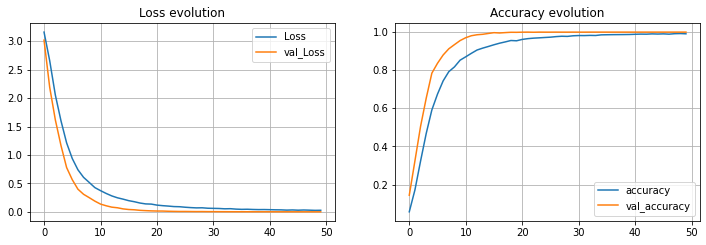

In [49]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

In [50]:
predicted_classes = cnn_model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


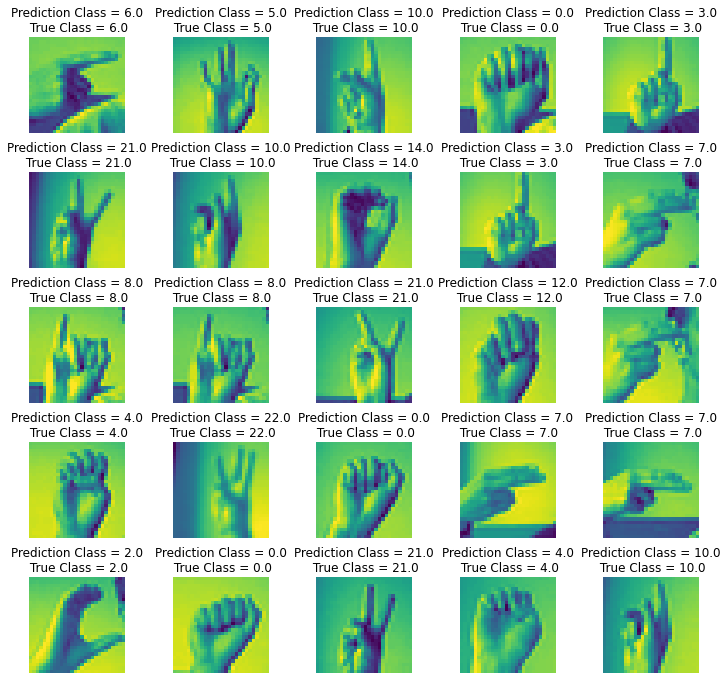

In [51]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predicted_classes)

In [53]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Computing confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

# Visualizing
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

   # Rotating the tick labels and setting their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Looping over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=2)

In [54]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

Confusion matrix, without normalization


<Figure size 1440x1440 with 0 Axes>

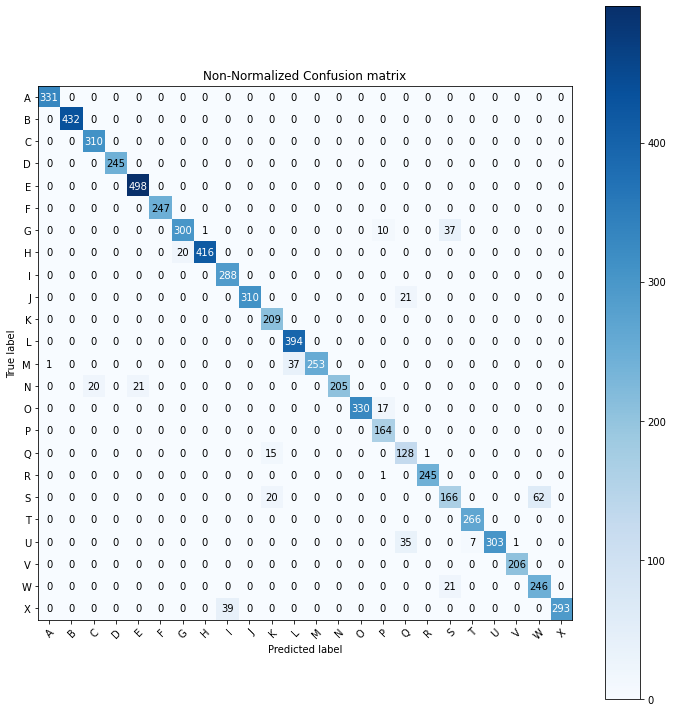

In [55]:
plt.figure(figsize=(20,20))
plot_confusion_matrix(y_test, predicted_classes, classes = class_names, title='Non-Normalized Confusion matrix')
plt.show()

Normalized confusion matrix


<Figure size 2520x2520 with 0 Axes>

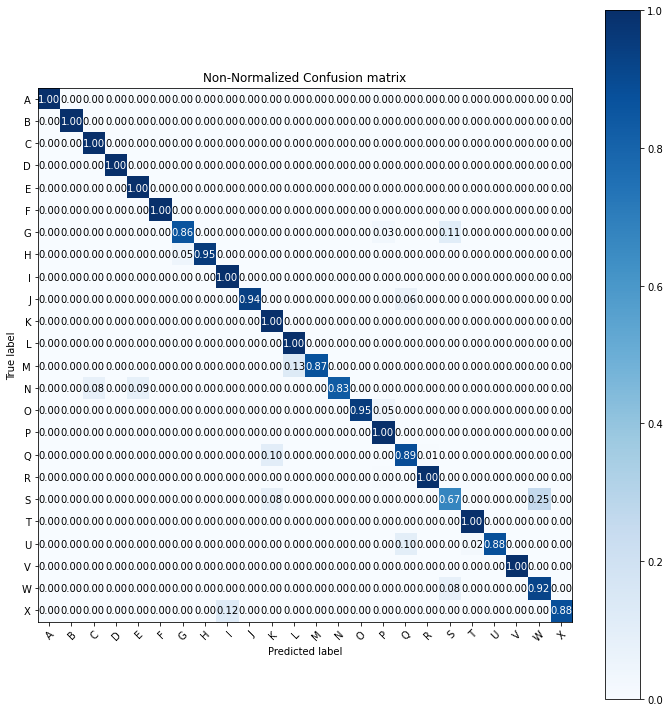

In [56]:
plt.figure(figsize=(35,35))
plot_confusion_matrix(y_test, predicted_classes, classes = class_names, normalize=True, title='Non-Normalized Confusion matrix')
plt.show()

In [57]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, predicted_classes)
print('Accuracy Score = ',100*acc_score)

Accuracy Score =  94.60401561628555
